                         Date  Fremont Bridge East Sidewalk  \
19680  12/31/2016 11:00:00 PM                           4.0   
19681  12/31/2016 10:00:00 PM                           7.0   
19682  12/31/2016 09:00:00 PM                           4.0   
19683  12/31/2016 08:00:00 PM                           3.0   
19684  12/31/2016 07:00:00 PM                           6.0   

       Fremont Bridge West Sidewalk  CombinedCount         Hour  Year  
19680                           4.0            8.0  11:00:00 PM  2016  
19681                           8.0           15.0  10:00:00 PM  2016  
19682                           6.0           10.0  09:00:00 PM  2016  
19683                           6.0            9.0  08:00:00 PM  2016  
19684                           4.0           10.0  07:00:00 PM  2016  


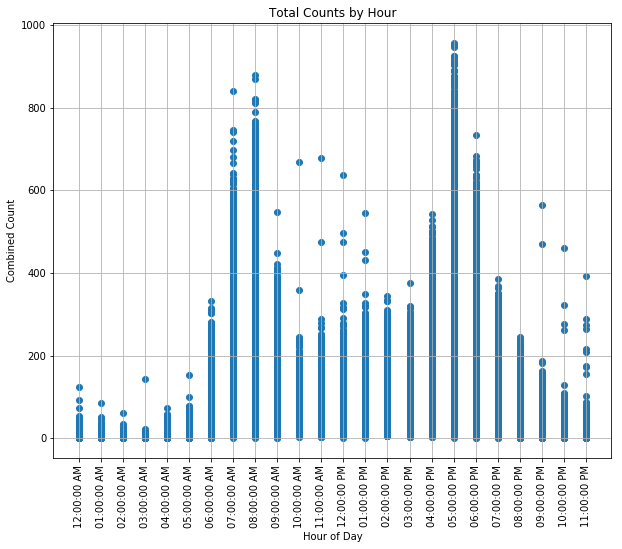

Busiest Hour (on average:) 05:00:00 PM


In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#1: Read the csv file into a pandas data frame
hourly_bikes = pd.read_csv('C:\\Users\halli_000\Desktop\SD\Homework\HW1\Fremont_Bridge_Hourly_Bicycle_Counts.csv')

#2: Add three new cols to the data frame
hourly_bikes['CombinedCount'] = (hourly_bikes['Fremont Bridge East Sidewalk'] + hourly_bikes['Fremont Bridge West Sidewalk'])
bikeTemp = hourly_bikes["Date"].str.split("\/", n = 2, expand = True)
bikeTemp2 = bikeTemp[2].str.split("\ ", n = 1, expand = True) 
hourly_bikes["Hour"]= bikeTemp2[1]
hourly_bikes["Year"]= bikeTemp2[0]

#3: Create a dataframe with the subset of data from the year 2016
hourly_bikes2016 = hourly_bikes[hourly_bikes.Year == '2016']

#4: Use pandas + matplotlib to plot the counts by hour 
fig, ax = plt.subplots()
plt.xticks(rotation=90) #make x-axis text vertical for legibility
ax.invert_xaxis() #invert x axis for legibility (hours should appear morning-night)
ax.scatter(hourly_bikes["Hour"], hourly_bikes["CombinedCount"])
ax.set(xlabel='Hour of Day', ylabel='Combined Count', title='Total Counts by Hour')
plt.gcf().set_size_inches((10, 8)) #make plot larger for legibility
ax.grid() #add grid lines for legibility
plt.show()

#5: Find the busiest hour of the day on average
bikeTemp3 = hourly_bikes.groupby(['Hour'])[['CombinedCount']].mean()
row_index = np.argmax(bikeTemp3['CombinedCount'])
print('Busiest Hour (on average:)', row_index)

